**Modelos continuos del tejido** \\
Adaptación del modelo de Blanch-Mercader et al. Soft Matter (2017) a una monocapa celular seminifinita que migra.



In [9]:
##############################################################
# Adaptación del modelo de Blanch-Mercader et al. Soft Matter 2017
# Miriam Gutiérrez UDC
# Modelización en Biomedicina, M2i
##############################################################

import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from scipy import special
from numpy import *


El modelo adimensional solo tiene un parámetro: $\displaystyle \lambda = \frac{L_\eta}{L_c}$ Ratio entre la distancia de fricción y la de transporte de polarización.

In [10]:
#
# Definición de los parámetros físicos
#
lamb = 1.001 # lamb = 1 singularidad evitable

Parámetros numéricos: definición de las mallas espacial y temporal

In [23]:
# Malla espacial
Nx = 100
X = linspace(-20., 0., Nx)
dX = X[1]-X[0]

# Malla temporal
Tfin = 10.0
Nt = 100
T = linspace(0., Tfin, Nt)


Definición de las funciones velocidad, polarización, esfuerzos y posición del frente (implementación de la solución analítica)
\begin{align*}
V(X) &= \frac{e^X}{1 - \lambda^2} \left[ 1 - \lambda e^{X \frac{1 - \lambda}{\lambda}} \right] \\
P(X) &= e^X \\
\Sigma(X) &= \frac{\lambda^2 e^X}{1 - \lambda^2} \left[ 1 - e^{X \frac{1 - \lambda}{\lambda}} \right]
\end{align*}

In [12]:
def velocity (X, lamb):
  V = exp(X) * (1 - lamb* exp(X * (1. - lamb) / lamb)) / (1.- lamb**2)
  return V

In [13]:
def polarization (X, lamb):
  P = exp(X)
  return P

In [14]:
def stress (X, lamb):
  Sigma = lamb**2 / (1. - lamb**2) * (exp(X) - exp(X / lamb))
  return Sigma

In [15]:
def xfront(T, Vfun, lamb):
  Xf = T * Vfun(0.0, lamb)
  return Xf

Representación de las funciones $\Sigma, P, V$

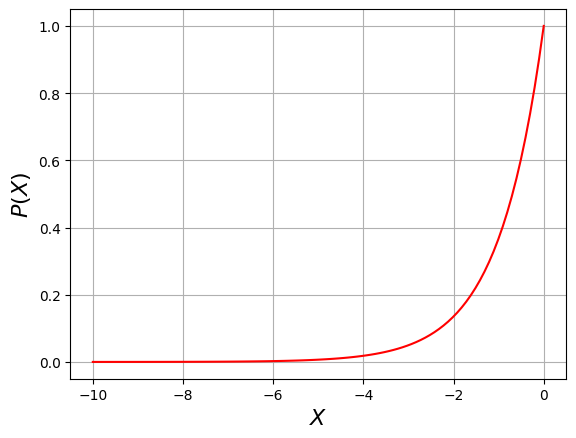

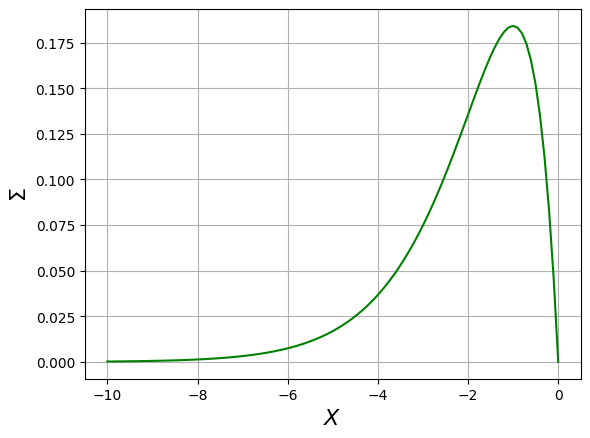

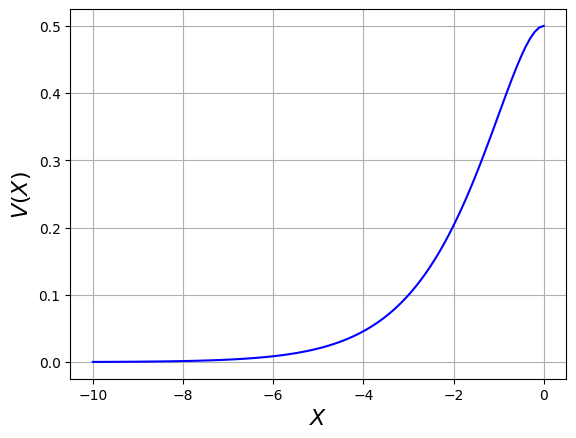

In [16]:
plt.figure(1)
plt.clf()
plt.plot(X, polarization(X, lamb), 'r-')
plt.xlabel('$X$', fontsize = 16)
plt.ylabel('$P(X)$', fontsize = 16)
plt.grid(True)

plt.figure(2)
plt.clf()
plt.plot(X, stress(X, lamb), 'g-')
plt.xlabel('$X$', fontsize = 16)
plt.ylabel('$\Sigma$', fontsize = 16)
plt.grid(True)

plt.figure(3)
plt.clf()
plt.plot(X, velocity(X, lamb), 'b-')
plt.xlabel('$X$', fontsize = 16)
plt.ylabel('$V(X)$', fontsize = 16)
plt.grid(True)

plt.show()

Introducimos la ecuación diferencial para la densidad adimensional R: \\
$ \partial_T R -V(0)\partial_X R + \partial_X (RV) = 0 $

In [43]:
def density_deriv(T, R, dX, Vfun, lamb):

  #Vectores
  dRV = zeros_like(R)
  dR = zeros_like(R)
  dRdt = zeros_like(R)

  # Flujo de masa y su derivada
  RV = R * Vfun(X, lamb)
  dRV[1:-1] = (RV[2:] - RV[:-2]) / (2. * dX)
  dRV[-1] = (3. * RV[-1] - 4.*RV[-2] + RV[-3]) / (2. * dX)

  # Derivada espacial de la densidad del campo
  dR[1:-1] = (R[2:] - R[:-2]) / (2. * dX)
  dR[-1] = (3. * R[-1] - 4.*R[-2] + R[-3]) / (2. * dX)

  # Derivada temporal de la densidad del campoi
  dRdt = Vfun(0, lamb) * dR - dRV

  return dRdt



In [44]:
# Condición inicial, la densidad del campo es igual a la inicial
R0 = ones_like(X)

t_span = (T[0], T[-1])
t_eval = T
sol = solve_ivp(lambda T, R: density_deriv(T, R, dX, velocity, lamb), t_span, R0, t_eval=t_eval)
R = sol.y.T

#R, infod = integrate.odeint(lambda R, T: density_deriv(R, T, dX, velocity, lamb), R0, T, full_output=True)

Mostramos graficamente la distrubución de la densidad (espacio-tiempo)

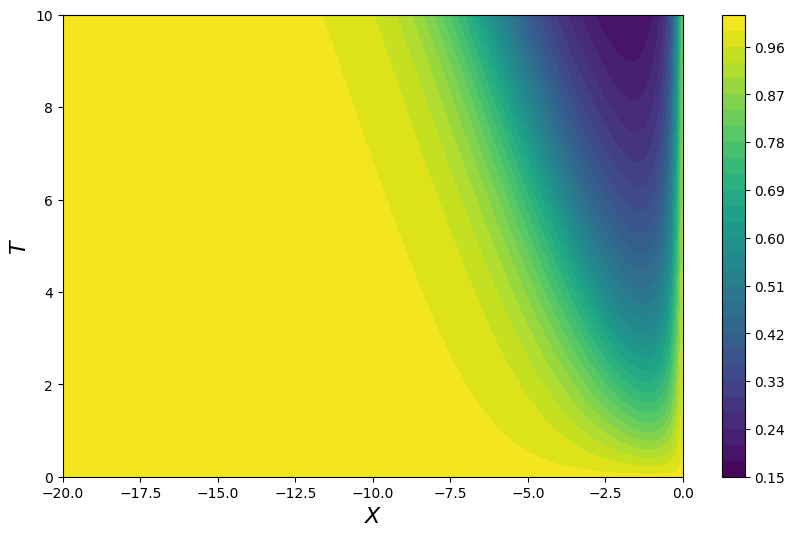

In [52]:
plt.figure(4, figsize = (10, 6), dpi = 100)
plt.clf()
cp = plt.contourf(X, T, R, levels=30, cmap='viridis')
plt.xlabel('$X$', fontsize = 16)
plt.ylabel('$T$', fontsize = 16)
plt.colorbar(cp)